# Imports, definitions and compiler path

The GCC flag to enable OpenMP directives is *-fopenmp*.

In [31]:
import os
import subprocess
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [32]:
# set environment (gcc here)
# If you start this notebook from a conda env, sometimes your PATH variable will not include everything that is under your user-defined environment (it may not load your ~/.bashrc). 
# In my case, I ran this notebook in a Mac where GCC was installed via Homebrew. Therefore, I had to do:
# os.environ['PATH'] = os.environ['PATH'] + ':/opt/homebrew/bin'
# for this to work properly. On a shared environment this is less likely to happen, but you may need to do a 'module load gcc'
try:
    comp = subprocess.run(['gcc', '--version'])
    print('gcc is available')
except:
    print('gcc could not be found. Make sure your PATH is set up correctly.')
    sys.exit()

gcc is available


In [44]:
# define compiler name, OpenMP flag and source file name
compiler = 'gcc'
flag = '-fopenmp'
sourcefile = 'saxpy_openmp.c'

In [45]:
def retrieve_time(stdout):
    """
    Retrieves time from subprocesses.run.stdout (specific to this code)
    You may have to adjust this depending on the standard C format output of your machine.
    """
    x = str(stdout)
    x = x.replace("s", "")
    x = x.replace("\n", "")
    x = x.replace("b", "")
    x = x.replace("'", "")
    return float(x[-10:-2])

# Compile the code

In [46]:
comp = subprocess.run([compiler, flag, sourcefile], capture_output=True)
if comp.returncode != 0:
    print('Compilation failed!')
    print('Error message: ', comp.stderr)
    sys.exit()
else:
    print('Compiled!')

Compiled!


# Run executable with different number of threads

After the compilation is performed, we can cast a different number of OpenMP threads by setting the environment variable *OMP_NUM_THREADS* before execution. From the command line, this would be, for example:

`export OMP_NUM_THREADS=4`

Here, we are going to wrap that on a call to the Python module *subprocess*, using the *os* module as well.

In [51]:
nthreads = 1
n = []
t = []
for i in range(6):
    os.environ['OMP_NUM_THREADS']=str(nthreads)
    run = subprocess.run(['./a.out'], capture_output=True)
    print("Number of threads: ", nthreads, run.stdout)
    t.append(retrieve_time(run.stdout))
    n.append(nthreads)
    nthreads = nthreads*2

Number of threads:  1 b'Time for SAXPY: 0.340843 s\n'
Number of threads:  2 b'Time for SAXPY: 0.181679 s\n'
Number of threads:  4 b'Time for SAXPY: 0.098634 s\n'
Number of threads:  8 b'Time for SAXPY: 0.062620 s\n'
Number of threads:  16 b'Time for SAXPY: 0.063565 s\n'
Number of threads:  32 b'Time for SAXPY: 0.063324 s\n'


# Plot results

Let us take a look at the scaling of the SAXPY execution time. A good way to do that is by comparing the time that it takes to run SAXPY using $N$ threads, $t_N$, to the time that it takes to run it using a single thread, $t_1$.

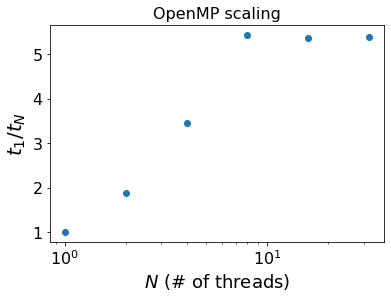

In [63]:
scaling = [t[0] / tN for tN in t]

plt.figure()
plt.scatter(n, scaling)
plt.xscale('log')
plt.xlabel('$N$ (# of threads)',fontsize=18)
plt.ylabel('$t_1 / t_N$', fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.title('OpenMP scaling', fontsize=16);

# Conclusions

- OpenMP is an easy approach to parallelize loop-intensive computation in an incremental fashion.
- Speedup can be quite linear, but it tends to saturate.
- Make sure the number of threads you are calling is compatible to your system.